In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def benchmark(mood_data):
    return pd.Series((mood_data.diff() ** 2).mean() * .5)

In [37]:
# Load the mood data per user, and create a general average mood as well.

users = list(pd.read_csv('dataset_mood_smartphone.csv').id.unique())
moodframe = pd.DataFrame(columns=users)
MSEframe = pd.DataFrame(columns=users)

for user in users:
    df = pd.read_csv('data_mounir/' + user +'.csv')
    df.head()
    moodframe[user] = df["mood"]
    
#General case. Only valid if we compare moods of users on the same day.
#moodframe["total"] = moodframe.mean(axis=1)    

# Run the benchmark per user and the general case and  Report MSE
for user in users:
    MSEframe[user] = benchmark(moodframe[user])
MSEframe.head()


,AS14.01,AS14.02,AS14.03,AS14.05,AS14.06,AS14.07,AS14.08,AS14.09,AS14.12,AS14.13,...,AS14.24,AS14.25,AS14.26,AS14.27,AS14.28,AS14.29,AS14.30,AS14.31,AS14.32,AS14.33
0,0.157171,0.470326,0.091812,0.299469,0.282443,1.129771,0.235278,0.310025,0.253875,0.565634,...,0.229632,0.261762,0.271196,0.316782,0.395571,0.233686,0.095676,0.107817,0.298727,0.59211


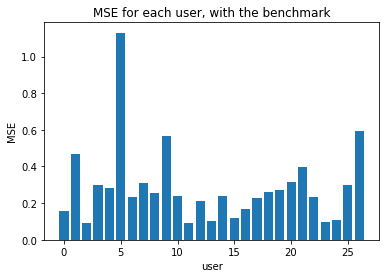

In [62]:
MSEs = np.asarray(MSEframe)
MSEs= MSEs[0]
plt.bar(range(len(MSEs)), MSEs)
plt.title("MSE for each user, with the benchmark")
plt.ylabel("MSE")
plt.xlabel("user")
plt.show()

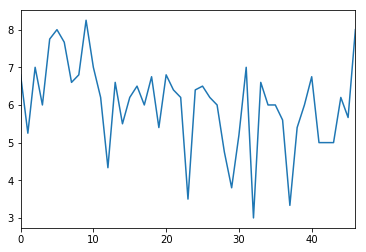

0.15717089371980678